# Leer archivos Excel (xls)

Para leer archivos de Excel (extensión `.xls`) en un elemento dataFrame de `pandas` debemos primero importar la biblioteca `pandas`:

In [3]:
import numpy as np
import pandas as pd

La función de `pandas` que se encarga de leer los archivos de Excel es `read_excel`. Los parámetros por defecto que utiliza se pueden ver a continuación:

`pd.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, engine=None, **kwds)`

Donde `io` será un string que corresponderá al nombre del archivo a leer si el archivo está alojado localmente o la URL si el archivo está en la red, `sheetname` será el nombre de la hoja de Excel que se quiere importar o un número en el cual 0 corresponde a la primera hoja. Para saber más de los otros parámetros puedes utilizar la ayuda de IPython escribiendo en una celda 

In [7]:
pd.read_excel?

y se desplegará la página de documentación de la función con una explicación pormenorizada de todos los parámetros. 

Supongamos que tenemos el archivo con nombre `tpob_2014-cp01.xls` descargado de la página del proyecto Open Data BCN con los datos de población por barrios de Barcelona y queremos cargarlo en nuestro notebook de Jupyter. Para hacerlo probaríamos:

In [16]:
df = pd.read_excel("data/tpob_2014-cp01.xls")
df.head(n=10)

,Característiques de la població per barris. Any 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Sexe,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dte.,NaN,Barris,TOTAL,Homes,Dones
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,BARCELONA,NaN,NaN,1613393,764650,848743
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1,NaN,1. el Raval,48471,26612,21859
6,NaN,1,NaN,2. el Barri Gòtic,15911,8420,7491
7,NaN,1,NaN,3. la Barceloneta,15181,7562,7619
8,NaN,1,NaN,"4. Sant Pere, Santa Caterina i la Ribera",22674,11376,11298
9,NaN,2,NaN,5. el Fort Pienc,31785,14974,16811


Podemos ver que las cabeceras no son las correctas porque aparecen en la fila de índice 1. La función leyó todo el archivo y asignó mal las cabeceras. para solucionar el problema podemos hacer una lectura del archivo pero ignorando las dos primeras filas de la siguiente manera:

In [17]:
df = pd.read_excel("data/tpob_2014-cp01.xls", skiprows=2)
df.head(n=10)

,Unnamed: 0,Dte.,Unnamed: 2,Barris,TOTAL,Homes,Dones
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,BARCELONA,NaN,NaN,1613393,764650,848743
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,NaN,1. el Raval,48471,26612,21859
4,NaN,1,NaN,2. el Barri Gòtic,15911,8420,7491
5,NaN,1,NaN,3. la Barceloneta,15181,7562,7619
6,NaN,1,NaN,"4. Sant Pere, Santa Caterina i la Ribera",22674,11376,11298
7,NaN,2,NaN,5. el Fort Pienc,31785,14974,16811
8,NaN,2,NaN,6. la Sagrada Família,51562,23673,27889
9,NaN,2,NaN,7. la Dreta de l'Eixample,43749,20088,23661


Ahora las cabeceras son las correctas pero aun podríamos elimimar las filas de índice 0 a 2 y quedarnos con los datos de los barrios, el total de barcelona ya lo podremos calcular como la suma de todos los barrios.
Para eliminar las filas que no queremos hacemos:

In [20]:
df2 = df.drop([0,1,2])
df2.head(n=10)

,Unnamed: 0,Dte.,Unnamed: 2,Barris,TOTAL,Homes,Dones
3,NaN,1,NaN,1. el Raval,48471,26612,21859
4,NaN,1,NaN,2. el Barri Gòtic,15911,8420,7491
5,NaN,1,NaN,3. la Barceloneta,15181,7562,7619
6,NaN,1,NaN,"4. Sant Pere, Santa Caterina i la Ribera",22674,11376,11298
7,NaN,2,NaN,5. el Fort Pienc,31785,14974,16811
8,NaN,2,NaN,6. la Sagrada Família,51562,23673,27889
9,NaN,2,NaN,7. la Dreta de l'Eixample,43749,20088,23661
10,NaN,2,NaN,8. l'Antiga Esquerra de l'Eixample,41975,19351,22624
11,NaN,2,NaN,9. la Nova Esquerra de l'Eixample,57863,26806,31057
12,NaN,2,NaN,10. Sant Antoni,38369,18073,20296


Donde utilizamos la función `drop` para eliminar las filas no deseadas (las de índices 0, 1 y 2). Observemos que los índices no se reajustan de nuevo a cero. Para volver a ponerlos a ceros debemos usar la función `reset_index`:

In [21]:
df3 = df2.reset_index()
df3.head(n=10)

,index,Unnamed: 0,Dte.,Unnamed: 2,Barris,TOTAL,Homes,Dones
0,3,NaN,1,NaN,1. el Raval,48471,26612,21859
1,4,NaN,1,NaN,2. el Barri Gòtic,15911,8420,7491
2,5,NaN,1,NaN,3. la Barceloneta,15181,7562,7619
3,6,NaN,1,NaN,"4. Sant Pere, Santa Caterina i la Ribera",22674,11376,11298
4,7,NaN,2,NaN,5. el Fort Pienc,31785,14974,16811
5,8,NaN,2,NaN,6. la Sagrada Família,51562,23673,27889
6,9,NaN,2,NaN,7. la Dreta de l'Eixample,43749,20088,23661
7,10,NaN,2,NaN,8. l'Antiga Esquerra de l'Eixample,41975,19351,22624
8,11,NaN,2,NaN,9. la Nova Esquerra de l'Eixample,57863,26806,31057
9,12,NaN,2,NaN,10. Sant Antoni,38369,18073,20296


Pero ahora la antigua columna de índices queda y no se elimina. Si queremos eliminar las columnas inútiles como ésta o las que aparecen con el nombre Unnamed:0 y Unnamed:2 podemos usar también `drop` pero tenemos que cambiar el eje (`axis`). Por defecto la función drop usa el parámetro axis = 0 que corresponde a las filas, pero si pponemos explícitamente axis = 1 le estaremos diciendo a drop que se trata de columnas. En nuetro caso deberá quedar:

In [22]:
df4 = df3.drop(['index', 'Unnamed: 0', 'Unnamed: 2'], axis = 1)
df4.head(n=10)

,Dte.,Barris,TOTAL,Homes,Dones
0,1,1. el Raval,48471,26612,21859
1,1,2. el Barri Gòtic,15911,8420,7491
2,1,3. la Barceloneta,15181,7562,7619
3,1,"4. Sant Pere, Santa Caterina i la Ribera",22674,11376,11298
4,2,5. el Fort Pienc,31785,14974,16811
5,2,6. la Sagrada Família,51562,23673,27889
6,2,7. la Dreta de l'Eixample,43749,20088,23661
7,2,8. l'Antiga Esquerra de l'Eixample,41975,19351,22624
8,2,9. la Nova Esquerra de l'Eixample,57863,26806,31057
9,2,10. Sant Antoni,38369,18073,20296


Ya nos queda mejor, ahora todas las columnas tienen sentido (Dte. corresponde al distrito). Quizás nos quedaría una última cosa, podríamos utilizar la columna barris como índice:

In [23]:
df5 = df4.set_index('Barris')
df5.head(n=10)

,Dte.,TOTAL,Homes,Dones
Barris,,,,
1. el Raval,1,48471,26612,21859
2. el Barri Gòtic,1,15911,8420,7491
3. la Barceloneta,1,15181,7562,7619
"4. Sant Pere, Santa Caterina i la Ribera",1,22674,11376,11298
5. el Fort Pienc,2,31785,14974,16811
6. la Sagrada Família,2,51562,23673,27889
7. la Dreta de l'Eixample,2,43749,20088,23661
8. l'Antiga Esquerra de l'Eixample,2,41975,19351,22624
9. la Nova Esquerra de l'Eixample,2,57863,26806,31057


Ahora sí tenemos los datos listos para utilizarlos. Por ejemplo, si quisiéramos saber el número total de habitantes, hombres y mujeres de Barcelona podemos usar el método `sum`:

In [26]:
df5.sum()

Dte.         456
TOTAL    1613393
Homes     764650
Dones     848743
dtype: float64

Para saber la media de habitantes por barrio:

In [27]:
df5.mean()

Dte.         6.246575
TOTAL    21802.608108
Homes    10333.108108
Dones    11469.500000
dtype: float64

Si queremos saber cuántos habitantes tiene el barrio más populoso:

In [28]:
df5[['TOTAL']].max()

TOTAL    57863
dtype: float64

Vemos que tiene 57863 habitantes, pero... ¿cuál es el barrio? Para saberlo debemos encontrar el índice de ese máximo:

In [29]:
df5[['TOTAL']].idxmax()

TOTAL    9. la Nova Esquerra de l'Eixample
dtype: object

Si quisieramos saber qué barrio tiene el mínimo de hombres:

In [30]:
df5[['Homes']].idxmin()

Homes    No consta
dtype: object

Nos aparece un "No consta". ¿De dónde sale esto? Si miramos las últimas filas de la tabla lo descubriremos:

In [31]:
df5.tail()

,Dte.,TOTAL,Homes,Dones
Barris,,,,
72. Sant Martí de Provençals,10,26018,12219,13799
73. la Verneda i la Pau,10,28903,13784,15119
No consta,NaN,1,0,1
NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN


Hay tres filas al final que no tienen sentido y que nos convendría eliminar:

In [35]:
df6 = df5.drop(['No consta', np.nan])
df6.tail()

,Dte.,TOTAL,Homes,Dones
Barris,,,,
69. Diagonal Mar i el Front Marítim del Poblenou,10,13351,6499,6852
70. el Besòs i el Maresme,10,23191,11889,11302
71. Provençals del Poblenou,10,20184,9748,10436
72. Sant Martí de Provençals,10,26018,12219,13799
73. la Verneda i la Pau,10,28903,13784,15119


Si ahora buscamos el barrio conmenos hombres:

In [37]:
df6[['Homes']].idxmin()

Homes    42. la Clota
dtype: object

y si queremos saber cuántos son:

In [38]:
df6.min()

Dte.       1
TOTAL    529
Homes    259
Dones    270
dtype: float64

vemos que son 259.

Una cosa a destacar es que cada vez que hacíamos operaciones sobre filas o columnas hacíamos una copia diferente del data frame, esto se debe a que si se hacen operaciones sobre filas o columnas el objeto original no se modifica y, si queremos que los cambios se guarden debemos ponerlos en un nuevo objeto.

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

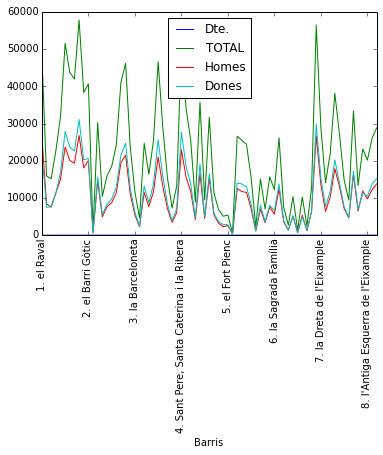

In [89]:
ax = df6.plot()
xlabels = list(df6.index)
ax.set_xticklabels(xlabels, rotation=90)